In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Hitters.csv")
df.dropna(inplace=True)

In [4]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
gbl_model = GradientBoostingRegressor().fit(X_train, y_train)

In [6]:
gbl_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [7]:
y_pred = gbl_model.predict(X_test)

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

351.49446976672664

**Model Tuning**


In [15]:
gbm_params = {'learning_rate': [0.001, 0.01, 0.1],
              'max_depth': [3, 5, 8, 10],
              'n_estimators': [100, 200],
              'subsample': [0.5, 0.8],
              'loss': ['absolute_error', 'huber', 'quantile', 'squared_error']}

In [16]:
gbm_params = {'learning_rate':[0.001,0.1],
              'max_depth': [3,5,8],
              'n_estimators': [100,200],
              'subsample': [1, 0.5,0.8],
              'loss': ['squared_error', 'absolute_error', 'huber']}

In [17]:
gbm_cv_model = GridSearchCV(gbl_model, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [18]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.5}

**Fianl Model**

In [21]:
model_tuned = GradientBoostingRegressor(learning_rate=0.1,loss="squared_error", max_depth=5, n_estimators=200, subsample=0.5).fit(X_train, y_train)

In [22]:
y_pred = model_tuned.predict(X_test)

In [23]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

335.80798003903556

**Hyperparameter significance level**

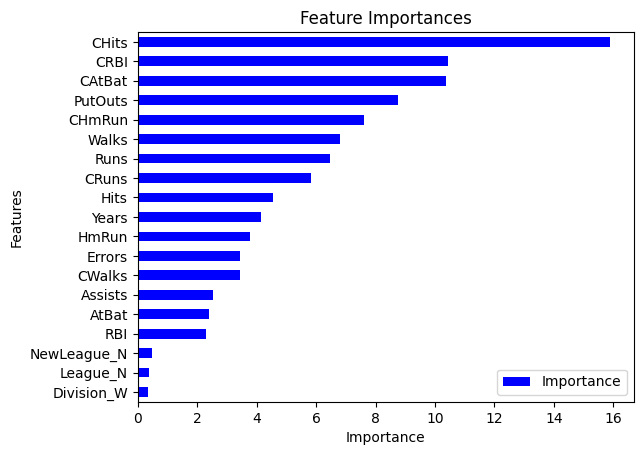

In [24]:
importance = pd.DataFrame({"Importance": model_tuned.feature_importances_*100,
                          "index": X_train.columns})

importance.sort_values(by="Importance",
                       axis = 0, # by rows
                       ascending=True).plot(x="index", y="Importance", kind="barh", color = "b")

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()
